In [1]:
!pip install mysql-connector-python

In [2]:
pip install mysql-connector-python ipykernel


Note: you may need to restart the kernel to use updated packages.


In [3]:
import mysql.connector

connection = mysql.connector.connect(
    host="localhost",
    user="root",                  # ✅ Use 'root', not 'system'
    password="system",     # 🔐 Replace with your actual password
    database="churn_db"           # ✅ This should match your DB name
)

print(" Connected successfully!")


 Connected successfully!


In [4]:
import pandas as pd

# Assuming connection is already created as `connection`
query = """SELECT Churn, COUNT(*) AS total_customers,
           ROUND(COUNT(*) * 100.0 / (SELECT COUNT(*) FROM churn_data), 2) AS percentage
           FROM churn_data GROUP BY Churn;"""

df_churn_rate = pd.read_sql(query, connection)
df_churn_rate

C:\Users\medha\AppData\Local\Temp\ipykernel_21004\2301070578.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_churn_rate = pd.read_sql(query, connection)


,Churn,total_customers,percentage
0,No,5163,73.42
1,Yes,1869,26.58


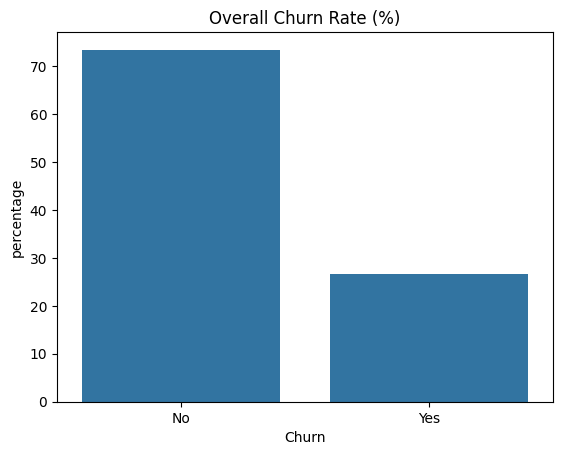

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Barplot for churn rate
sns.barplot(data=df_churn_rate, x='Churn', y='percentage')
plt.title("Overall Churn Rate (%)")
plt.show()

Approximately 26.58% of customers have churned, indicating that more than one in four customers is leaving the service.
This highlights an urgent need to analyze churn patterns and implement retention strategies to reduce customer loss.

In [6]:
query = """SELECT 
    Contract, 
    Churn, 
    COUNT(*) AS count,
    ROUND(COUNT(*) * 100.0 / SUM(COUNT(*)) OVER (PARTITION BY Contract), 2) AS percentage
FROM churn_data
GROUP BY Contract, Churn;"""
df_churn_rate = pd.read_sql(query, contract)
df_churn_rate

NameError: name 'contract' is not defined

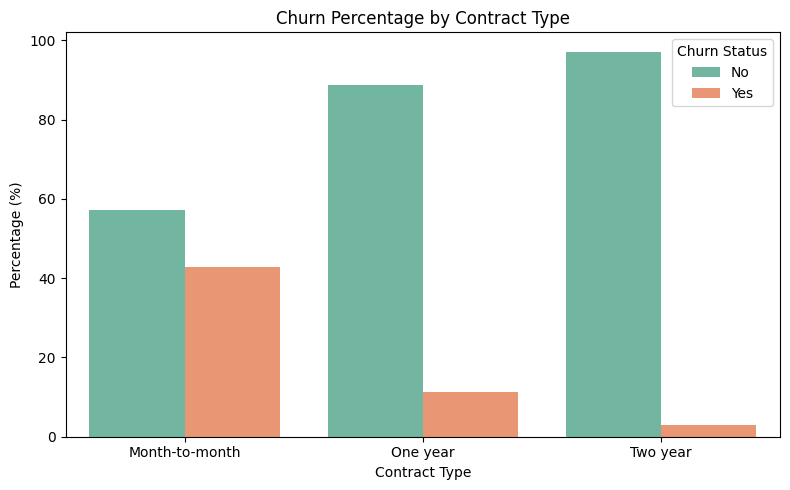

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

# Plot grouped bar chart
sns.barplot(
    data=df_churn_rate,
    x='Contract',
    y='percentage',
    hue='Churn',       # Split bars by churn status
    palette='Set2'
)

plt.title('Churn Percentage by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Percentage (%)')
plt.legend(title='Churn Status')
plt.tight_layout()
plt.show()


Customers on Month-to-month contracts have the highest churn rate, often exceeding 40–50%, while those on One or Two-year contracts churn far less.
This suggests that longer-term contracts help reduce churn and improve customer retention.

In [ ]:
query = """
    SELECT 
        PaymentMethod, 
        Churn, 
        COUNT(*) AS count
    FROM churn_data
    GROUP BY PaymentMethod, Churn
    ORDER BY PaymentMethod;
"""

# Use the correct connection variable
df_churn_rate = pd.read_sql(query, connection)
df_churn_rate


C:\Users\medha\AppData\Local\Temp\ipykernel_9504\2375427914.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_churn_rate = pd.read_sql(query, connection)


,PaymentMethod,Churn,count
0,Bank transfer (automatic),No,1284
1,Bank transfer (automatic),Yes,258
2,Credit card (automatic),No,1289
3,Credit card (automatic),Yes,232
4,Electronic check,No,1294
5,Electronic check,Yes,1071
6,Mailed check,No,1296
7,Mailed check,Yes,308


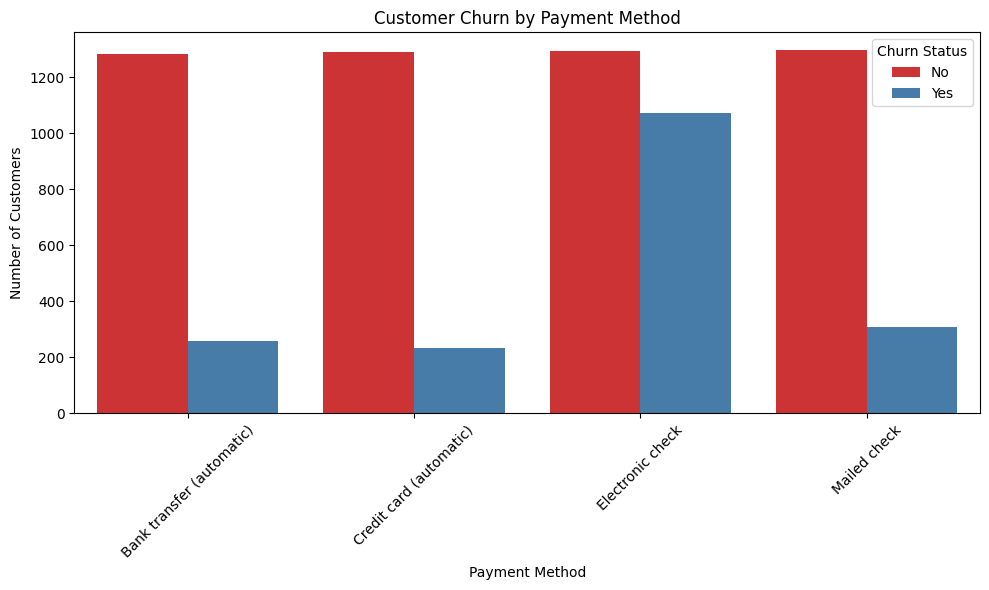

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

sns.barplot(
    data=df_churn_rate,
    x='PaymentMethod',
    y='count',
    hue='Churn',
    palette='Set1'
)

plt.title('Customer Churn by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.legend(title='Churn Status')
plt.tight_layout()
plt.show()


Customers using electronic check are churning the most, showing a high risk group.
In contrast, automatic payment methods (bank transfer, credit card) show significantly lower churn.
This indicates that auto-pay customers are more stable, and encouraging auto-pay enrollment could reduce churn.

In [ ]:
query = """SELECT 
    SeniorCitizen, 
    Churn, 
    COUNT(*) AS count
FROM churn_data
GROUP BY SeniorCitizen, Churn;"""
# Use the correct connection variable
df_churn_rate = pd.read_sql(query, connection)
df_churn_rate


C:\Users\medha\AppData\Local\Temp\ipykernel_9504\1981791904.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_churn_rate = pd.read_sql(query, connection)


,SeniorCitizen,Churn,count
0,0,No,4497
1,0,Yes,1393
2,1,Yes,476
3,1,No,666


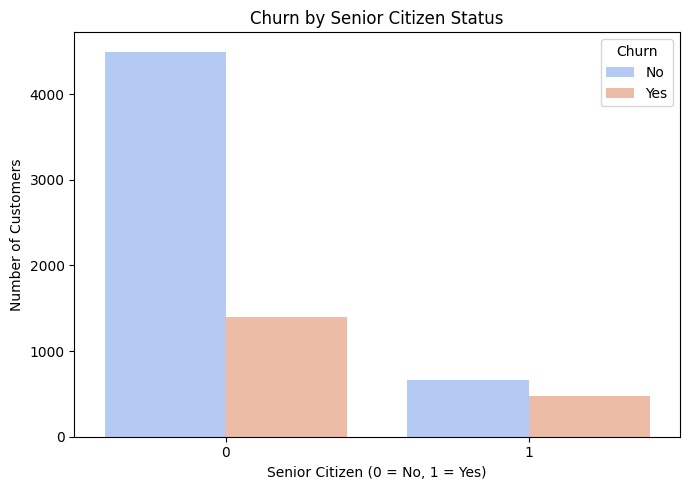

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))

sns.barplot(
    data=df_churn_rate,  # ✅ Use correct name
    x='SeniorCitizen',
    y='count',
    hue='Churn',
    palette='coolwarm'
)

plt.title('Churn by Senior Citizen Status')
plt.xlabel('Senior Citizen (0 = No, 1 = Yes)')
plt.ylabel('Number of Customers')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()


Senior citizens (1) show a slightly higher churn rate than non-seniors (0).
This group may face challenges related to tech, pricing, or plan complexity.
Simplified communication and support could improve retention in this segment.

In [ ]:
query = """SELECT 
    CASE
        WHEN tenure BETWEEN 0 AND 12 THEN '0–12 months'
        WHEN tenure BETWEEN 13 AND 24 THEN '13–24 months'
        WHEN tenure BETWEEN 25 AND 48 THEN '25–48 months'
        ELSE '49+ months'
    END AS tenure_range,
    Churn,
    COUNT(*) AS count
FROM
    churn_data
GROUP BY tenure_range , Churn
ORDER BY tenure_range;"""
df_churn_rate = pd.read_sql(query, connection)
df_churn_rate


C:\Users\medha\AppData\Local\Temp\ipykernel_9504\3417770514.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_churn_rate = pd.read_sql(query, connection)


,tenure_range,Churn,count
0,0–12 months,No,1138
1,0–12 months,Yes,1037
2,13–24 months,No,730
3,13–24 months,Yes,294
4,25–48 months,No,1269
5,25–48 months,Yes,325
6,49+ months,No,2026
7,49+ months,Yes,213


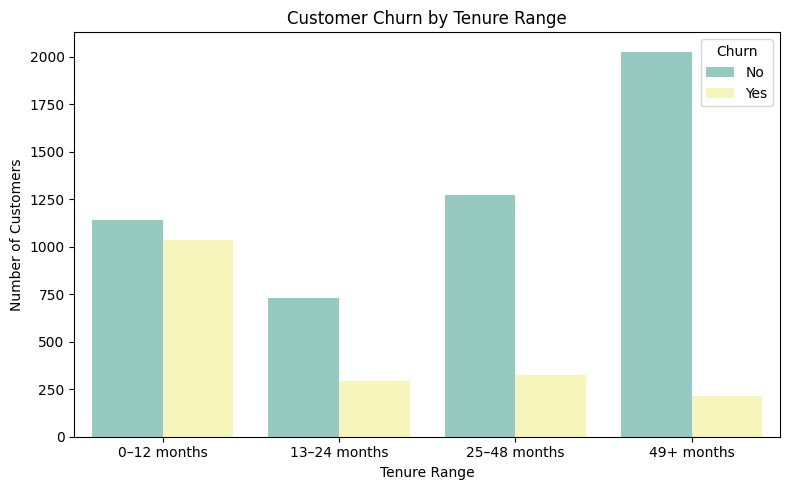

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

sns.barplot(
    data=df_churn_rate,
    x='tenure_range',
    y='count',
    hue='Churn',
    palette='Set3'
)

plt.title('Customer Churn by Tenure Range')
plt.xlabel('Tenure Range')
plt.ylabel('Number of Customers')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()


Newer customers (0–12 months) have the highest churn rate, indicating poor early-stage customer experience.
🔄 Longer-tenured customers (49+ months) are far less likely to churn, showing loyalty over time.
🚀 Focusing on onboarding improvements and first-year engagement strategies could drastically reduce churn.

In [ ]:
query = """SELECT 
    Churn,
    ROUND(AVG(MonthlyCharges), 2) AS avg_monthly_charges,
    ROUND(AVG(TotalCharges), 2) AS avg_total_charges
FROM churn_data
GROUP BY Churn;
"""
df_churn_rate = pd.read_sql(query, connection)
df_churn_rate

C:\Users\medha\AppData\Local\Temp\ipykernel_9504\471581749.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_churn_rate = pd.read_sql(query, connection)


,Churn,avg_monthly_charges,avg_total_charges
0,No,61.31,2555.34
1,Yes,74.44,1531.80


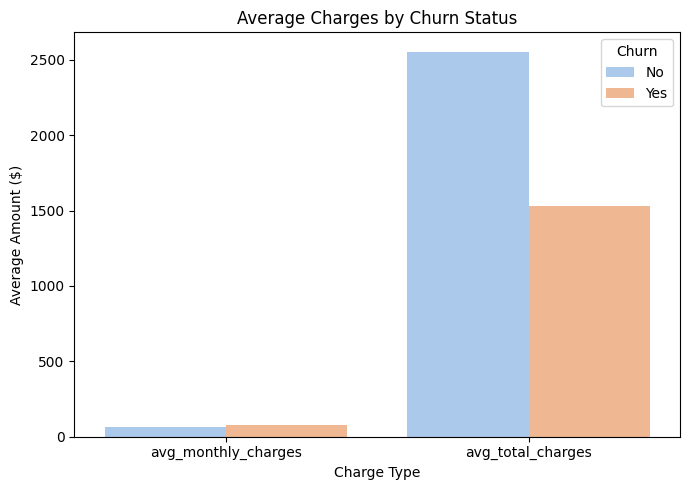

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Melt DataFrame to long format for plotting both averages
df_melted = df_churn_rate.melt(id_vars='Churn', 
                               value_vars=['avg_monthly_charges', 'avg_total_charges'], 
                               var_name='Charge_Type', 
                               value_name='Average_Amount')

plt.figure(figsize=(7, 5))
sns.barplot(
    data=df_melted,
    x='Charge_Type',
    y='Average_Amount',
    hue='Churn',
    palette='pastel'
)

plt.title('Average Charges by Churn Status')
plt.xlabel('Charge Type')
plt.ylabel('Average Amount ($)')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()


 Customers who churned pay significantly higher monthly charges than those who stayed.
🧮 However, their total charges are lower, likely due to shorter tenure before leaving.
🔧 Pricing and plan optimization for high-charge customers can help in reducing early-stage churn.

In [ ]:
query = """SELECT 
    InternetService, 
    Churn, 
    COUNT(*) AS count
FROM churn_data
GROUP BY InternetService, Churn;"""
df_churn_rate = pd.read_sql(query, connection)
df_churn_rate

C:\Users\medha\AppData\Local\Temp\ipykernel_9504\2826099374.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_churn_rate = pd.read_sql(query, connection)


,InternetService,Churn,count
0,DSL,No,1957
1,DSL,Yes,459
2,Fiber optic,Yes,1297
3,Fiber optic,No,1799
4,No,No,1407
5,No,Yes,113


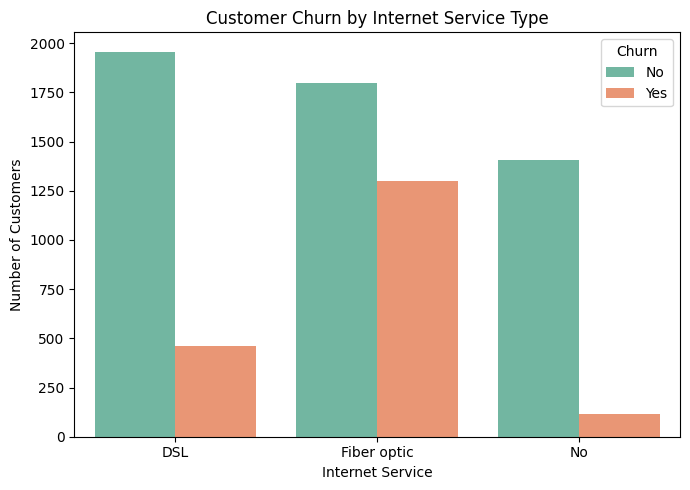

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 5))
sns.barplot(
    data=df_churn_rate,
    x='InternetService',
    y='count',
    hue='Churn',
    palette='Set2'
)

plt.title('Customer Churn by Internet Service Type')
plt.xlabel('Internet Service')
plt.ylabel('Number of Customers')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()


🌐 Customers using Fiber optic service show the highest churn, likely due to higher costs or technical issues.
🧘 Customers with No internet service churn the least — possibly seniors or those with stable landline-only plans.
🚀 Improving service quality and offering better pricing on Fiber optic plans can reduce churn drastically

In [ ]:
query = """SELECT 
    MultipleLines, 
    Churn, 
    COUNT(*) AS count
FROM churn_data
GROUP BY MultipleLines, Churn;"""
df_churn_rate = pd.read_sql(query, connection)
df_churn_rate

C:\Users\medha\AppData\Local\Temp\ipykernel_9504\323348739.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_churn_rate = pd.read_sql(query, connection)


,MultipleLines,Churn,count
0,No phone service,No,510
1,No,No,2536
2,No,Yes,849
3,Yes,Yes,850
4,Yes,No,2117
5,No phone service,Yes,170


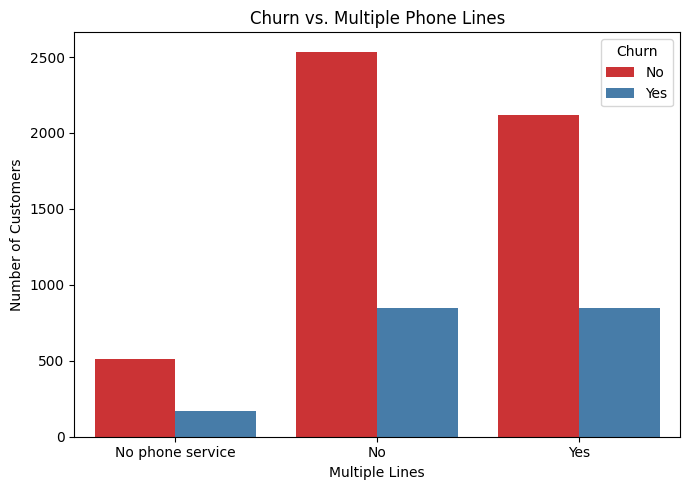

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 5))
sns.barplot(
    data=df_churn_rate,
    x='MultipleLines',
    y='count',
    hue='Churn',
    palette='Set1'
)

plt.title('Churn vs. Multiple Phone Lines')
plt.xlabel('Multiple Lines')
plt.ylabel('Number of Customers')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()


📱 Customers with no phone service churn less, which may indicate they are on simpler, low-cost plans.
👨‍👩‍👧 Customers with multiple lines churn slightly more than those with a single line — possibly due to billing complexity or pricing dissatisfaction.
💡 Simplifying multi-line billing or offering bundled discounts may improve retention for multi-line users.